# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [120]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import requests

In [121]:
# Using path workaround to load chromedriver
from selenium.webdriver.chrome.service import Service
my_service = Service(executable_path='c:\Program Files\ChromeDriver\chromedriver.exe')
browser = Browser('chrome', service=my_service)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [122]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)
# Optional delay for loading the page
browser.is_element_present_by_css('div.list_text', wait_time=1)


False

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [123]:
# Scrape the website
html = browser.html

# Create a BeautifulSoup object from the scraped HTML
soup = soup(html, 'html.parser')

In [124]:
# Extract all rows of data
extract = soup.find("div", class_ = "py-4")

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [125]:
# Create an empty list
table_list = []
header = []

In [126]:
# Find the header information
table_header = extract.find("table", class_ = "table")
header_info = table_header.find_all("th")

# loop to pull in each column header
for th in header_info:
    
    header.append(th.text)
    
header

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [127]:
# Loop through the scraped data to create a list of rows
for td in rows:
    row_data = []

    # nested loop to get all row data
    for data in td.find_all('td'):
        
        row_data.append(data.text)
    
    # append the table data
    table_data.append(row_data)
    

In [128]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df_mars = pd.DataFrame(table_data, columns = header)

In [129]:
# Confirm DataFrame was created successfully
df_mars.head(10)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
5,57,2012-08-21,15,158,6,-78.0,740.0
6,68,2012-08-22,16,158,6,-77.0,740.0
7,79,2012-08-23,17,159,6,-76.0,742.0
8,112,2012-08-27,21,161,6,-74.0,741.0
9,114,2012-08-28,22,162,6,-74.0,742.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [130]:
# Examine data type of each column
df_mars.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [131]:
# Change data types for data analysis
df_mars['id']=df_mars['id'].astype(int)
df_mars['terrestrial_date']=pd.to_datetime(df_mars['terrestrial_date'])
df_mars['sol']=df_mars['sol'].astype(int)
df_mars['ls']=df_mars['ls'].astype(int)
df_mars['month']=df_mars['month'].astype(int)
df_mars['min_temp']=df_mars['min_temp'].astype(float)
df_mars['pressure']=df_mars['pressure'].astype(float)

In [132]:
# Confirm type changes were successful by examining data types again
df_mars.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [133]:
# 1. How many months are there on Mars?
mars_months = df_mars.month.nunique()
print(f"There are {mars_months} months on Mars.")

There are 12 months on Mars.


In [134]:
# 2. How many Martian days' worth of data are there?
data_days = df_mars['sol'].nunique()
print(f"There are {data_days} Martian days' worth of data in the dataset.")

There are 1867 Martian days' worth of data in the dataset.


In [135]:
# 3. What is the average low temperature by month?
avg_low_temp = df_mars.groupby("month")["min_temp"].mean()
print(avg_low_temp)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


Text(0.5, 1.0, 'Average Temperature by Month')

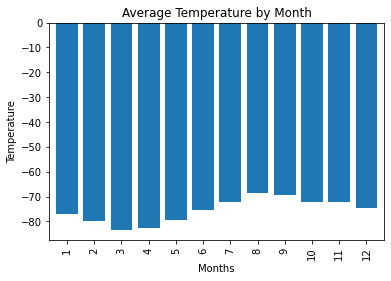

In [136]:
# Plot the average temperature by month
# Instructions state to plot the average minimum temp by month, not the average temp.  Reflected below.
avg_low_temp.plot(kind = 'bar', width = 0.8)
plt.xlabel("Months")
plt.ylabel("Temperature")
plt.title("Average Temperature by Month")


In [137]:
# Identify the coldest and hottest months in Curiosity's location


In [138]:
# To find the coldest month, look for the lowest temp
df_mars.loc[(df_mars['min_temp'] == df_mars['min_temp'].min())] 

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1093,1119,2015-12-09,1188,79,3,-90.0,881.0
2960,1119,2015-12-09,1188,79,3,-90.0,881.0
4827,1119,2015-12-09,1188,79,3,-90.0,881.0
6694,1119,2015-12-09,1188,79,3,-90.0,881.0
8561,1119,2015-12-09,1188,79,3,-90.0,881.0


In [139]:
# We do not have a high temp, so to find the warmest month, looking for the warmest minimum temp
df_mars.loc[(df_mars['min_temp'] == df_mars['min_temp'].max())] 

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1582,1614,2017-05-10,1692,2,1,-62.0,820.0
3449,1614,2017-05-10,1692,2,1,-62.0,820.0
5316,1614,2017-05-10,1692,2,1,-62.0,820.0
7183,1614,2017-05-10,1692,2,1,-62.0,820.0
9050,1614,2017-05-10,1692,2,1,-62.0,820.0


In [140]:
# 4. Average pressure by Martian month
avg_pressure = df_mars.groupby("month")["pressure"].mean()

print(avg_pressure)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


Text(0.5, 1.0, 'Average Pressure by Month')

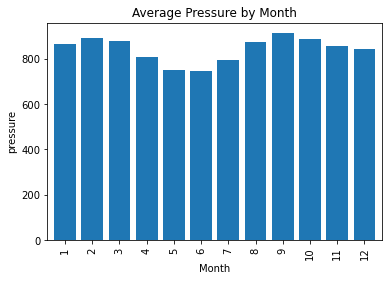

In [141]:
# Plot the average pressure by month
avg_pressure.plot(kind = 'bar', width = 0.8)
plt.xlabel("Month")
plt.ylabel("pressure")
plt.title("Average Pressure by Month")

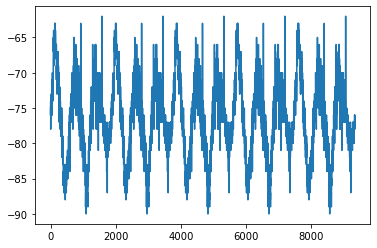

In [142]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Per the instructions, plotting the minimum temperature to obtain a visual estimate.
# True calculation might be to obtain days where the sun's position is the same and calculate that difference
mars_days = df_mars["min_temp"]
mars_days.plot()


The third month had the coldest average minimum temperature, and the eight month had the warmest minimum temperature.  Interestingly enough, the highest minimum temperature was contained in the first month, while the third month contained the absolute lowest recorded temperature in the dataset at -90.0 degrees.

Atmospheric pressure, on average, is highest in month nine and lowest in month six.

Using low temperature as a rough estimate, the average year on Mars appears to be around 675 days, which is the difference between temperature peaks.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [143]:
# Write the data to a CSV
df_mars.to_csv("mars_weather_analysis.csv")

In [144]:
browser.quit()